# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

# Desarrollo

## Pregunta 1

Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

<AxesSubplot:xlabel='x', ylabel='y'>

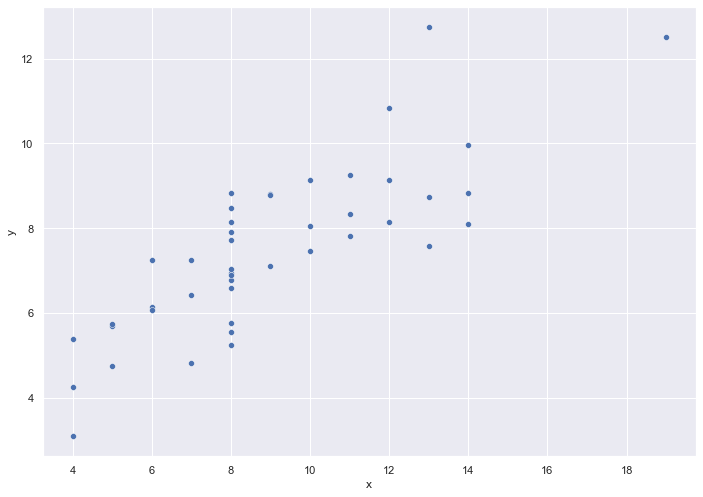

In [3]:
#scatter para todo el datoframe
sns.scatterplot(data=df, x="x", y="y")

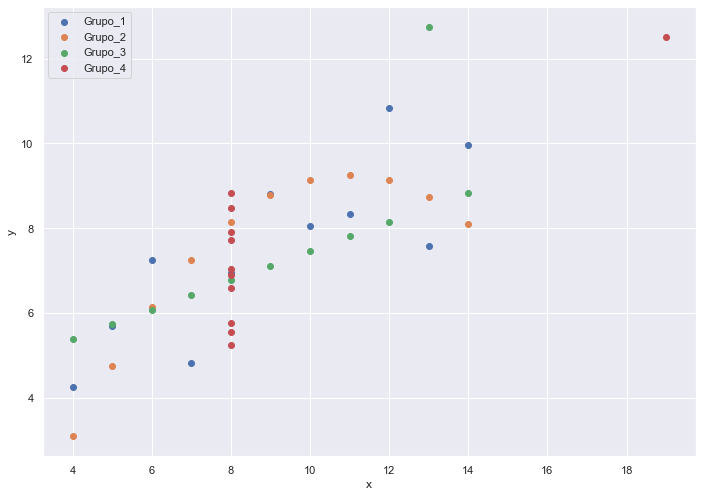

In [4]:
#scatter separdo por grupos
fig,ax = plt.subplots()
for i in range(1,5):
    i = 'Grupo_'+str(i)
    df_aux = df.loc[df['grupo']== i]
    x_axis = df_aux['x']
    y_axis = df_aux['y']
    ax.scatter(x_axis,y_axis,label=i)

    ax.legend()
    ax.grid(True)

    plt.xlabel('x')
    plt.ylabel('y')

Text(0.5, 1.0, 'Grupo 4')

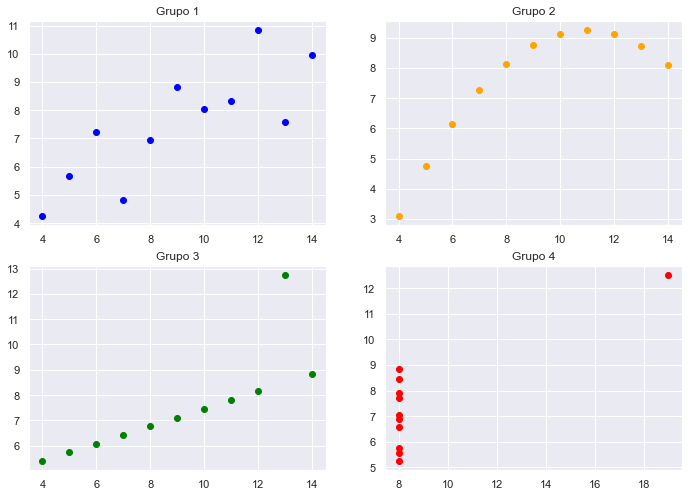

In [5]:
#extrayendo por grupo se tienen los siguientes scatter
x1,y1 = df.loc[df['grupo']=='Grupo_1']['x'], df.loc[df['grupo']=='Grupo_1']['y']

x2,y2 = df.loc[df['grupo']=='Grupo_2']['x'], df.loc[df['grupo']=='Grupo_2']['y']

x3,y3 = df.loc[df['grupo']=='Grupo_3']['x'], df.loc[df['grupo']=='Grupo_3']['y']

x4,y4 = df.loc[df['grupo']=='Grupo_4']['x'], df.loc[df['grupo']=='Grupo_4']['y']


plt.subplot(221)
plt.scatter(x1,y1,color='blue')
plt.title('Grupo 1')

plt.subplot(222)
plt.scatter(x2,y2,color='orange')
plt.title('Grupo 2')

plt.subplot(223)
plt.scatter(x3,y3,color='green')
plt.title('Grupo 3')

plt.subplot(224)
g_y4=plt.scatter(x4,y4,color='red')
plt.title('Grupo 4')

¿Los grupos son muy distintos entre si?

Respuesta: Si, por inspección notar la dispersión que tienen cada gráfico.

## Pregunta 2

Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [6]:
for i in range(1,5):
    i = "Grupo_" + str(i)
    print(i)
    print(df.loc[df['grupo']== i].describe())
    print()

Grupo_1
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

Grupo_2
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

Grupo_3
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

Grupo_4
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000

## Pregunta 3

Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete

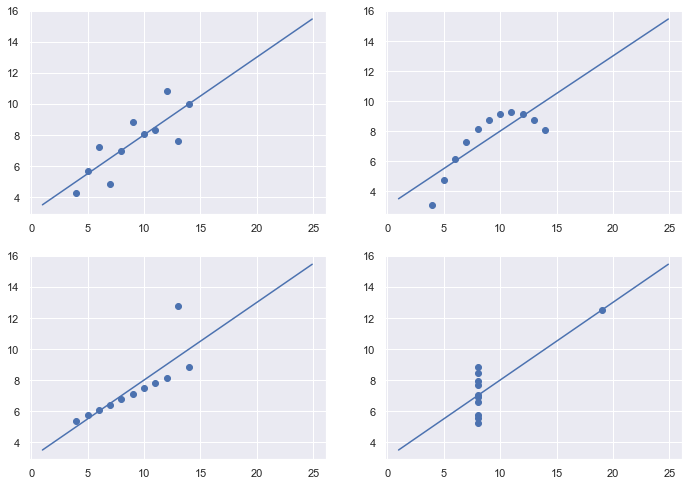

In [7]:
from sklearn.linear_model import LinearRegression

datos = [[x1,y1],[x2,y2],[x3,y3],[x4,y4]]
model_rl = LinearRegression()               # Creando el modelo.

for i in range(0,4):
    recta = model_rl.fit(pd.DataFrame(datos[i][0]), pd.DataFrame(datos[i][1]))
    beta_0, beta_1 = recta.intercept_, recta.coef_[0]
    
    plt.subplot(2,2,i+1)
    plt.scatter(datos[i][0], datos[i][1])    #dispersion
    x_range = np.arange(1,25,0.1)            #rango data
    plt.plot(x_range, beta_0 + beta_1*x_range) #recta de ajuste

## Pregunta 4

Calcule los resultados de las métricas para cada grupo. Interprete.

In [8]:
import statsmodels.api as sm
from metrics_regression import *
from sklearn.metrics import r2_score

In [9]:
# Para el GRUPO 1
result_group1 = sm.OLS(y1, sm.add_constant(x1)).fit()
print(result_group1.summary())
print('\nMetricas para el grupo 1:\n')

lista1 = []
for i in model_rl.predict(pd.DataFrame(x1)).tolist():
    lista1.append(i[0])

df_temp1 = pd.DataFrame({'y':y1, 'yhat': lista1})
print(summary_metrics(df_temp1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00217
Time:                        02:53:00   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

C:\Users\danny\anaconda3\envs\MAT281_2\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Interpretación:** Notese que el valor "mmape" (Mean absolute percentage error) es cercano al 10%, por lo que el modelo lineal se ajusta de buena forma a los datos entregados por el Grupo 1.

In [10]:
# Para el GRUPO 2
result_group2 = sm.OLS(y2, sm.add_constant(x2)).fit()
print(result_group2.summary())
print('\nMetricas para el grupo 2:\n')

lista2 = []
for i in model_rl.predict(pd.DataFrame(x2)).tolist():
    lista2.append(i[0])

df_temp2 = pd.DataFrame({'y':y2, 'yhat': lista2})
print(summary_metrics(df_temp2))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00218
Time:                        02:53:00   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.0

C:\Users\danny\anaconda3\envs\MAT281_2\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Interpretación:** Notese que el valor "mmape" en este caso es cercano al 15%, pero se tiene un coeficiente de correlacion del 0.66, por lo que el modelo lineal no se ajusta de muy buena forma a los datos entregados por el Grupo 2.

In [11]:
# Para el GRUPO 3
result_group3 = sm.OLS(y3, sm.add_constant(x3)).fit()
print(result_group3.summary())
print('\nMetricas para el grupo 3:\n')

lista3 = []
for i in model_rl.predict(pd.DataFrame(x3)).tolist():
    lista3.append(i[0])

df_temp3 = pd.DataFrame({'y':y3, 'yhat': lista3})
print(summary_metrics(df_temp3))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00218
Time:                        02:53:00   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025      1.124      2.670      0.0

C:\Users\danny\anaconda3\envs\MAT281_2\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Interpretación:** Notese que el valor "mmape" es cercano al 7%, por lo que posee errores porcentuales demasiados bajos, pero lamentablemnte tenemos un coeficiente de correlacion del 0.66, lo cual hace referncia a que quizas haya un outlier que haya afectado al correcto ajuste del modelo lineal para el Grupo 3.

In [12]:
# Para el GRUPO 4
result_group4 = sm.OLS(y4, sm.add_constant(x4)).fit()
print(result_group4.summary())
print('\nMetricas para el grupo 4:\n')

lista4 = []
for i in model_rl.predict(pd.DataFrame(x4)).tolist():
    lista4.append(i[0])

df_temp4 = pd.DataFrame({'y':y4, 'yhat': lista4})
print(summary_metrics(df_temp4))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00216
Time:                        02:53:00   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0017      1.124      2.671      0.0

C:\Users\danny\anaconda3\envs\MAT281_2\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Interpretación:** Notese que, viendo el grafico, lamentablemente no se tiene una idea de correcta función que interpole de manera correcta los datos que ahi se presentan, estan muy cercanos entre si, pero lamentablemente uno sobre otro verticalmente, lo cual, sumado al error de correlación de 0,66, hace que el modelo lineal (y a priori, ninguno) se ajuste a los datos presentados.

## Pregunta 5

Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.

**Solucion:** Adaptaremos de mejor manera cada grafico, particularmente para los tres primeros, se sigue:

In [13]:
#Para los datos de Grupo 1, haremos un reg_lasso de modo de discrimiar si es mejor o peor que sin hacerlo
from sklearn import linear_model

data = df.loc[df["grupo"]=="Grupo_1"]
X, y = data[["x"]], data[["y"]]

reg_lasso = linear_model.Ridge(alpha=.5)
reg_lasso= reg_lasso.fit(X,y)
y_pred = reg_lasso.predict(X)

r2_score(y, y_pred)

0.6665288123176956

Notese que se mantuvo, por lo que no hay diferencia entre usarlo y no, a gusto del consumidor:)

C:\Users\danny\anaconda3\envs\MAT281_2\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


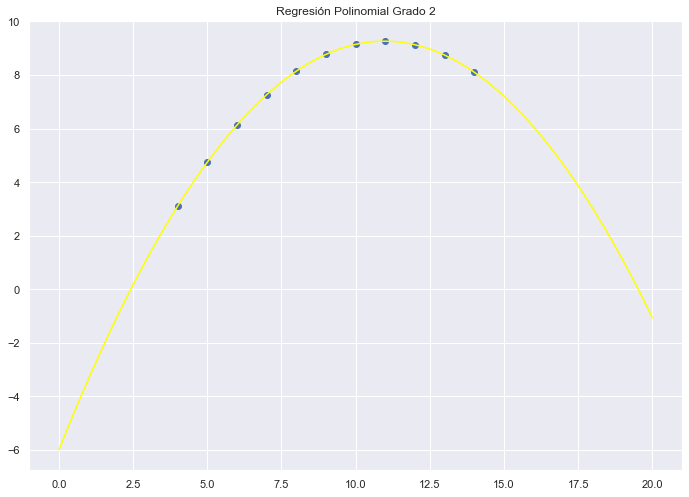


Metricas para el regresor:

      mae  mse   rmse    mape   maape   wmape   mmape   smape   r2
0  0.0009  0.0  0.001  0.0001  0.0001  0.0001  0.0001  0.0001  1.0


In [14]:
#Para los datos del Grupo 2, notemos que el metodo lineal no es de muy buen ajuste para los datos, por lo que
# haremos un ajuste polinomial, de modo de ajustar mejor, se sigue
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
data2 = df.loc[df["grupo"]=="Grupo_2"]
X,y = data2[["x"]], data2["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grado = 2
polyreg = make_pipeline(PolynomialFeatures(grado),LinearRegression())
plt.figure()
plt.scatter(X,y)

X_seq = np.linspace(0,20,300).reshape(-1,1)
polyreg.fit(X,y)

plt.plot(X_seq,polyreg.predict(X_seq),color="yellow")
plt.title("Regresión Polinomial Grado "+str(grado))
plt.show()

# Metricas para medición
df_temp = pd.DataFrame({'y':y_test, 'yhat': polyreg.predict(X_test)})
df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test,polyreg.predict(X_test)),4)
print('\nMetricas para el regresor:\n')
print(df_metrics)

Notar que el ajuste hecho es casi perfecto, se ajusta demasiado bien a los datos entregados y por sobre todo tenemos un r^2=1, pudiendo concluir que es mucho mejor que un ajuste lineal.

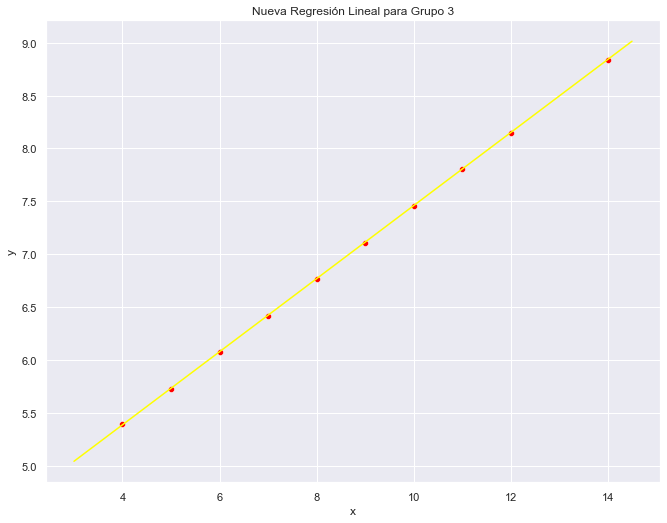

0.999993107581533

In [15]:
#Para los datos del Grupo 3, notemos que podemos eliminar ciertos outliers de modo de mejorar la recta de ajuste, se sigue
data3 = df.loc[df["grupo"]=="Grupo_3"]
mask = data3["y"]<12           #eliminamos outlaier
data3 = data3[mask]
X, y = data3[["x"]], data3[["y"]]

modelo_rl = LinearRegression() #Creamos el modelo de RL.
modelo_rl.fit(X, y) 

beta_0, beta_1 = modelo_rl.intercept_[0], modelo_rl.coef_[0]

x_range = np.arange(3,15,0.5)
df_plot = pd.DataFrame({'x':x_range, 'y_true':[beta_0 + beta_1[0]*n for n in x_range]})
df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})

fig, ax = plt.subplots(figsize=(11, 8.5))
sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="red")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="yellow")

plt.title('Nueva Regresión Lineal para Grupo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Metricas
y_pred = modelo_rl.predict(X)
r2_score(y, y_pred)

Notar que el ajuste hecho quitando el outlier sobre 12 es casi perfecto, se ajusta demasiado bien a los datos entregados y tenemos un r2_score casi cercano a uno, lo cual ajusta de excelente manera los datos para el Grupo 3.

**Para el Grupo 4:** Notar que no hay ninguna recta vertical que sea "funcion", habria que cambiar la orientacion de los ejes ("x" por "y"), pero nos afecta a los demas graficos para los demas grupos, por lo que, de poder hacerlo SOLAMENTE para este Grupo, entonces hacemos el mismo proceso de arriba, quitando los outlier extremos y ajustando lo mas posible la curva de modo que se pueda inferir los datos por sobre esa recta.